# Photovoltaik-Statistik

## Import data from .xls spreadsheet

In [1]:
import pandas as pd

file = 'photovoltaics_statistics.xls'

xl = pd.ExcelFile(file)

df = xl.parse('Tabelle1')

#Alternative way to load a sheet into a dataframe
#df = pd.read_excel(xl, 'Tabelle1')

In [2]:
year_list = []
month_list = []
production_list = []
for element in df.loc[:,'date']:
    year_list.append(element//100)
    month_list.append(element%100)

production_list = []
for element in df.loc[:,'kWh']:
    production_list.append(element)

In [3]:
min_list = [99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999,99999]
max_list = [0,0,0,0,0,0,0,0,0,0,0,0]
months = [1,2,3,4,5,6,7,8,9,10,11,12]

for index, element in enumerate(month_list):
    if max_list[element-1] < production_list[index]:
        max_list[element-1] = production_list[index]
    if min_list[element-1] > production_list[index]:
        min_list[element-1] = production_list[index]

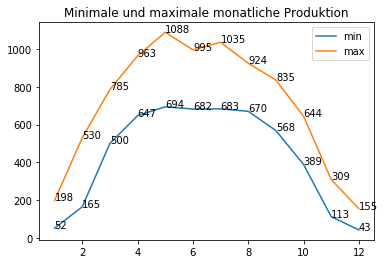

In [6]:
import pylab as plt

plt.figure('minmax')
plt.clf()

plt.plot(months, min_list, label = 'min')
plt.plot(months, max_list, label = 'max')
plt.legend()
plt.title("Minimale und maximale monatliche Produktion")

for a,b in zip(months, min_list):
    plt.text(a, b, str(b))
for a,b in zip(months, max_list):
    plt.text(a, b, str(b))
plt.show()

In [7]:
average_list = [0,0,0,0,0,0,0,0,0,0,0,0]
average_sum_list = [0,0,0,0,0,0,0,0,0,0,0,0]
average_counter = [0,0,0,0,0,0,0,0,0,0,0,0]

for index, element in enumerate(month_list):
    average_sum_list[element-1] += production_list[index]
    average_counter[element-1] += 1

for index, element in enumerate(average_sum_list):
    average_list[index] = element / average_counter[index]

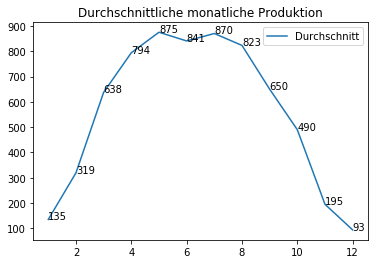

In [8]:
plt.figure('average')
plt.clf()
plt.plot(months, average_list, label = 'Durchschnitt')
plt.legend()
plt.title("Durchschnittliche monatliche Produktion")

for a,b in zip(months, average_list):
    plt.text(a, b, str(int(b)))
plt.show()

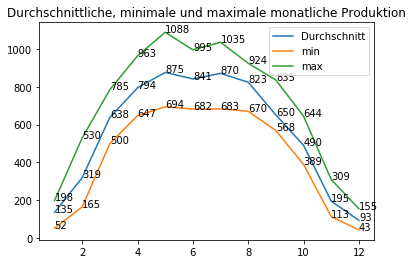

In [10]:
plt.figure('average')
plt.clf()
plt.plot(months, average_list, label = 'Durchschnitt')

plt.plot(months, min_list, label = 'min')
plt.plot(months, max_list, label = 'max')

plt.legend()
plt.title("Durchschnittliche, minimale und maximale monatliche Produktion")

for a,b in zip(months, average_list):
    plt.text(a, b, str(int(b)))
    
for a,b in zip(months, min_list):
    plt.text(a, b, str(b))
for a,b in zip(months, max_list):
    plt.text(a, b, str(b))
    
plt.show()

In [11]:
total_production = sum(production_list)

print("Total production: " + str(total_production) + " kWh")
yearly_cost = 100
income_per_kWh = 0.431
number_of_years = max(year_list) - min(year_list)
total_income = total_production * income_per_kWh - number_of_years * yearly_cost
print("Total income: " + str(total_income) + " €")

cost = 22500
profit = total_income - cost
profit_per_year = profit / number_of_years
yield_estimate = profit_per_year / cost

print (yield_estimate)

print(total_production / number_of_years * income_per_kWh)

Total production: 60358 kWh
Total income: 25114.298 €
0.012910113580246909
2890.4775555555557


In [13]:
yearly_production_dict = {}

for index, element in enumerate(month_list):
    temp_yearly_production = 0
    if element == 1:
        try:
            for i in range(12):
                temp_yearly_production += production_list[index + i]
            yearly_production_dict[year_list[index]] = temp_yearly_production
        except:
            pass
        
#print(yearly_production_dict)
#print(max(yearly_production_dict.values()))          

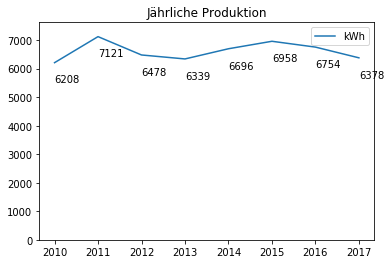

In [14]:
plt.figure('yearly_production')
plt.clf()
plt.plot(yearly_production_dict.keys(), yearly_production_dict.values(), label = 'kWh')

plt.legend()
plt.title("Jährliche Produktion")
plt.ylim(0, max(yearly_production_dict.values()) + 500)

for a,b in zip(yearly_production_dict.keys(), yearly_production_dict.values()):
    plt.text(a, b - 700, str(int(b)))
    
plt.show()

In [15]:
list_of_year_lists = []
current_year = year_list[0]
temp_month_list = []
temp_production_list = []
for index, element in enumerate(month_list):
    if year_list[index] == current_year:
        temp_month_list.append(element)
        temp_production_list.append(production_list[index])
    else:
        list_of_year_lists.append([current_year, temp_month_list, temp_production_list])
        temp_month_list = []
        temp_production_list = []
        temp_month_list.append(element)
        temp_production_list.append(production_list[index])
        current_year = year_list[index]

list_of_year_lists.append([current_year, temp_month_list, temp_production_list])

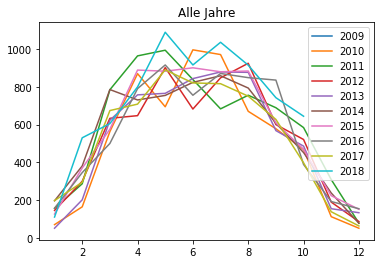

In [42]:
plt.figure('all_years')
plt.clf()

for element in list_of_year_lists:
    plt.plot(element[1], element[2], label = element[0])

plt.legend()
plt.title("Alle Jahre")
plt.show()